# ***Review***
---
# ***Convolutional neural networks: for sentence classification (2014)***  

---
- Yoon Kim, New York University 
- [관련 영상](https://www.youtube.com/watch?v=_0bOjspRG6s)

---

## ***CNN 아키텍처***
---

# ***Recursive NN***
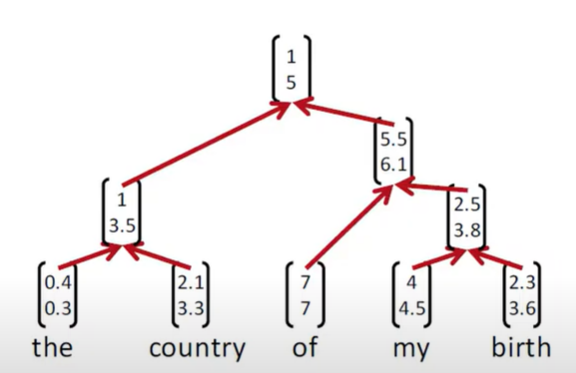

- The country of my birth 처럼 비교적 응집성이 높은 문법적 관계가 높은 입력값들을 트리 구조로 만들면서 학습하는 네트워크
- 이런식으로 파싱된 말뭉치가 없다면 학습을 하기 어렵다.

---
# ***Recurrent NN***
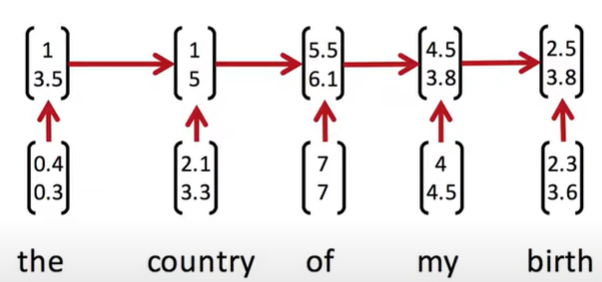

- 입력된 값들을 순차적으로 놓기 때문에 파싱이 안되어 있어도 학습이 가능.
- 하지만, 마지막 단어가 별 의미없는 단어라면 학습에 방해가 될 수도 있다.

---
# ***Convolution NN***
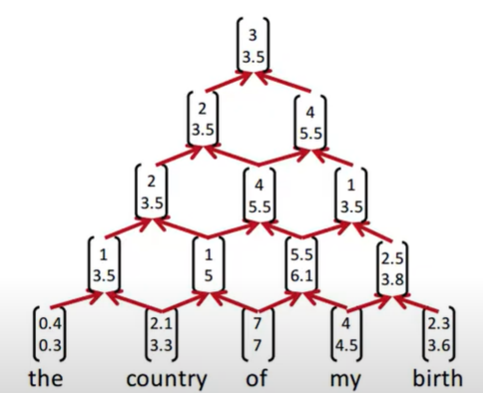

- 문법적 관계를 고려하지 않음.
- 이웃 단어끼리 묶어서 분석.

---
# ***Why CNN?***
- CNN은 이미지에서 쓰였는데 텍스트에도 좋은 성능을 보여서 주목을 받고 있다.
### ***Filter***




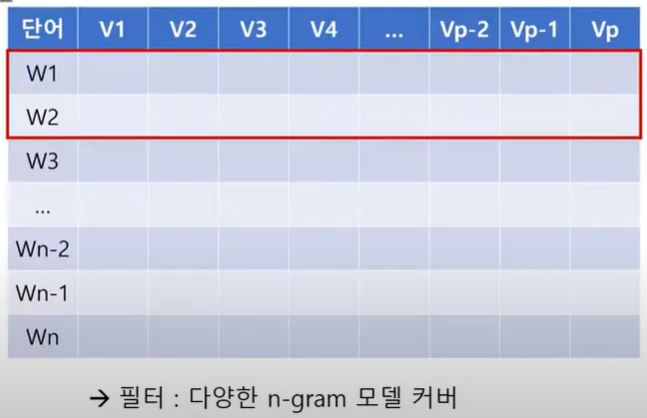

---
- 필터 : 입력 값들을 순차적으로 슬라이딩하면서 지역구조를 반영하는 역할.
- 필터의 크기는 빨간색 박스의 크기라면 단어를 2개씩 보는 것 - 바이그램 모델을 커버할 수 있다.
- 크기를 얼마든지 늘릴수 있고 유연하게 조절할 수 있음
- 다양한 n-gram 모델을 커버할 수 있다는게 CNN의 텍스트 처리에서의 장점이다.
---

## ***N-gram***
- 이전에 등장한 모든 단어를 고려하는 것이 아니라 일부 단어만 고려하는 접근 방법.

ex) I will do it for you

***유니그램 (1-gram)***
- I, will, do, it, for, you


***바이그램 (2-gram)***

- I will, will do, do it, it for, for you

***트라이그램 (3-gram)***


- I will do, will do it, do it for, it for you


***N이 4이상일때는 gram 앞에 숫자를 붙여서 명명***

---

참고자료 : https://wikidocs.net/21692


### ***Pooling***
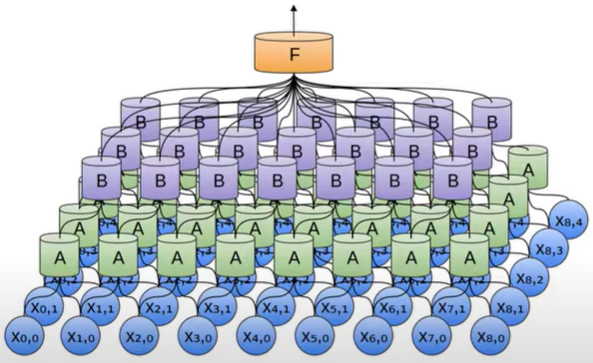



---
- 풀링도 마찬가지로 쓰인다.
- 풀링 : 지역 구조를 전체적으로 보게 하면서 최대값 풀링인 max pooling과 평균값 풀링인 Average Pooling이 존재한다.

> 쉽게 지역구조를 전체적으로 추상화하는 역할을 함.

- 필터가 뽑아낸 로컬 정보를 풀링의 존재로 추상화하여 성능이 많이 향상됨.

---
# ***모델 개요***


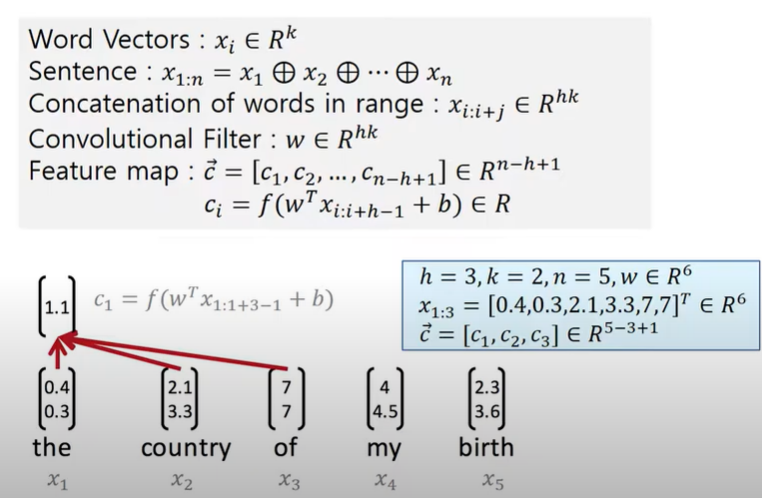

---
- 각 단어에 x1, x2, x3, x4, x5 들은 단어 벡터들이다.
- 각 벡터는 2차원 벡터이므로 k = 2가 되고, 3개씩 단어를 보기 때문에 h = 3이 된다.
- x1 ~ x3까지 필터가 한번 보고 그 다음 x2 ~ x4 , x3 ~ x5를 보게되는 구조다
- 이렇게 해서 만들이 진 것들이 Feature Map 이라고 보고 n-h+1에 해당하는 갯수가 된다.
- 여기서 n 은 sentnece의 갯수 여기서는 n = 5 이다 
- feature map의 C라는 벡터는 3개의 요소로 이루어진 3차원 벡터가 된다.
---


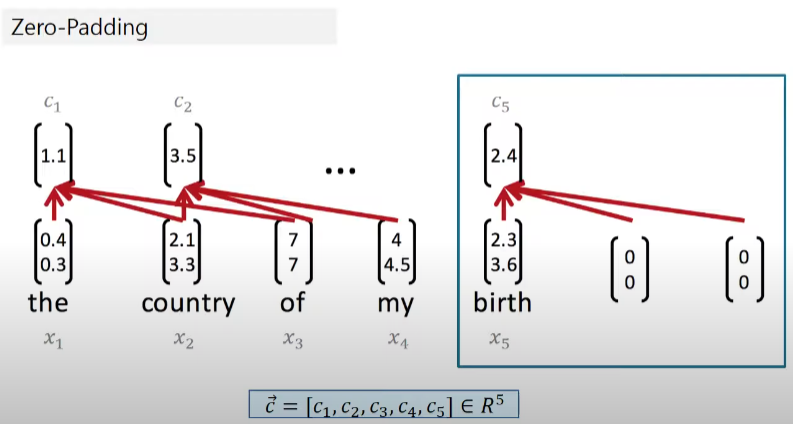

---
- 패딩도 많이 늘 쓰이는 기법 중 하나.
- 전 단표에서는 피쳐맵 벡터가 3차원 벡터였는데 제로 패딩을 하면 입력 문장의 길이인 5개 그대로 피쳐맵이 산출.
---

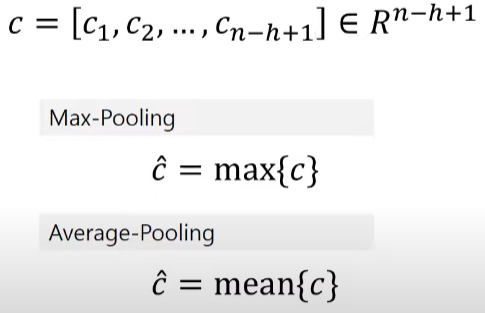

---

패딩을 안한 기준으로 보면 요소값 중 최대값을 취하는게 Max Pooling 
평균을 취하는게 Average Pooling

---

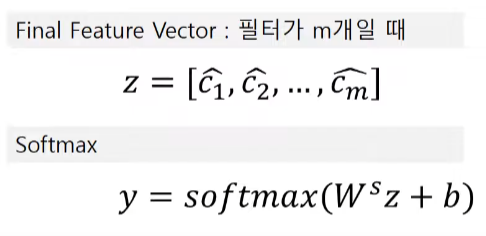

---
- 만약 필터가 m개이면 m개만큼의 풀링된 결과가 나오는데 이것을 모두 벡터로 바꾼 Final Feature Vector가 z 
- z에 대해서 Ws를 내적한 다음 bias를 더해준 후, softmax를 취해서 정답과 비교한 다음 역전파를 하는 구조.
---

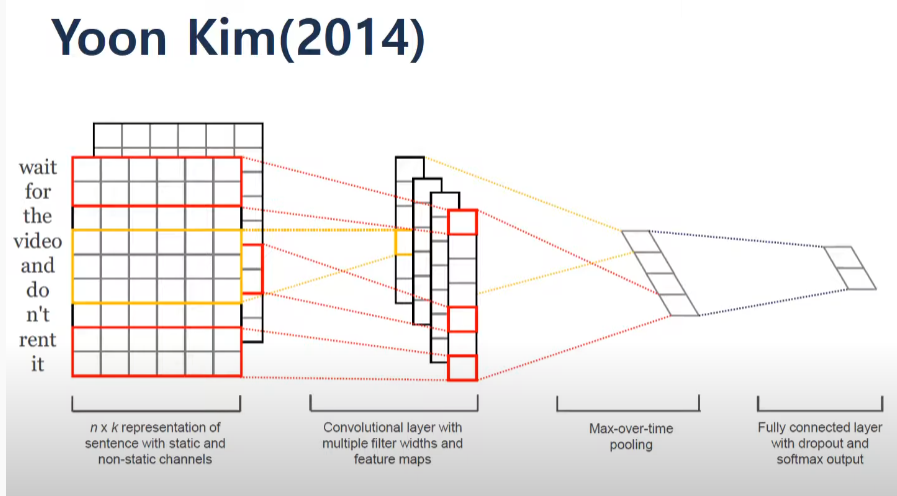

---
> **본 논문의 아키텍쳐**
- 문장이 있다고 가정하고 문장에 각 단어에 해당하는 벡터를 묶어서 하나의 입력값을 만듬.
- 빨간색 박스는 바이그램에 해당하는 필터, 노란색 박스는 트라이그램에 해당하는 필터. 
- 필터 갯수만큼의 오른쪽에 Feature Map들이 나오고 요소값의 최대값 풀링을 취해서 Final Feature를 취함
- 3번째 단계에서 Fully connected layer에는 Ws라는 matrix를 내적해주고 bias를 더해준 것을 소프트맥스를 취해준게 본 논문의 CNN 아키텍쳐이다.

---


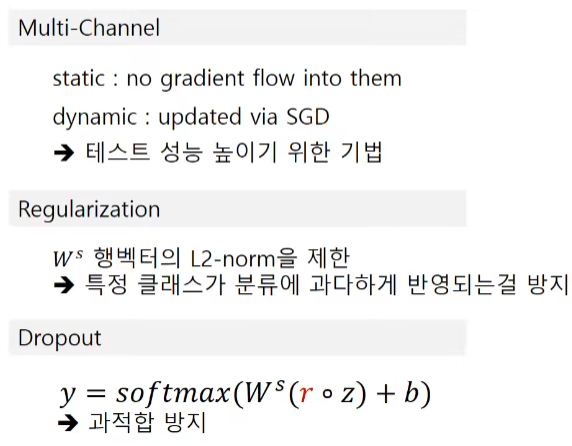

---
- 본 논문의 아키텍쳐에는 몇가지 기법들이 있는데 그 중하나가 Multi-Channel.
- 스태틱과 다이나믹이라는 개념이 있다.
- 그래디언트를 전파 시킬때 weight들을 학습 시키는 구조의 기본이 CNN의 학습인데 단어 벡터 자체를 학습 시킬 수도 있다.

> ***Dynamic***
- 단어 벡터 학습은 필터의 Weight나 Fully Connected Layer에 붙어있는 가중치 Matrix를 분류에 최적화 시키도록 학습시키는 것과 마찬가지로 단어 벡터들도 긍정이면 긍정, 부정이면 부정 이런 분류 문제에 최적화 될수 있는 입력값으로 순차적으로 업데이트 하는 것을 단어벡터의 학습

> ***Static***
- Static은 학습이 종료가 되어도 처음에 단어에 입력했던 단어 벡터를 그대로 사용. 
- 즉 업데이트 없이 사용.

--- 
- Weight는 단어에 대해서 해당하는 단어벡터를 갖고오는데 Static은 시작부터 종료까지 단어 벡터가 안바뀐다.
- 다이내믹은 시작과 종료의 단어벡터가 다르다.
- 이것들은 테스트 성능을 높이기 위해서 사용.
- 학습 말뭉치에는 많이 존재하지 않다가 테스트 말뭉치에는 많이 나타나는 단어가 있다고 치면 그 단어들이 많이 나와도 분류하는데 지장이 없도록 채널을 두 개로 멀티로 두어서 성능을 높이기 위한 기법이다.

--- 
- Regularization은 맨 마지막에 Fully Connected Layer에서 Ws 행 벡터의 L2-norm을 제한하는 방식. 
- 특정 클래스가 분류에 과다하게 반영되는걸 방지하기 위해서 정규화를 사용.
- 학습에서 특정 노드 연산에 대해 해제하는 것은 Dropout. 
- 여기서 r은 랜덤으로 1, 0으로 배치되어서 0이되면 해당 노드에 연산을 사용하지 않는 기법이다.

---

# ***CNN의 순전파와 역전파***

---


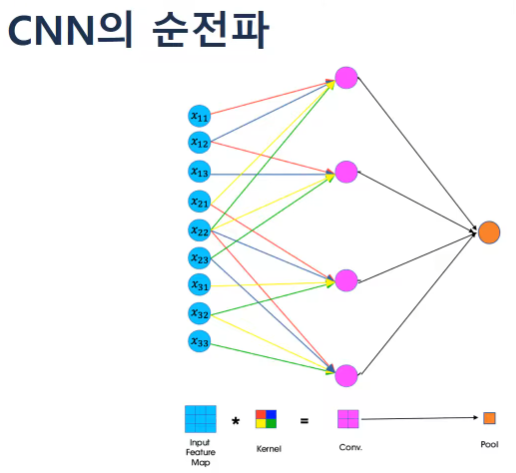

---
- 하늘색이 입력 벡터들이고 커널이라는 것은 필터라고 보면 된다.
- 필터가 이 입력값들을 슬라이딩 하면서 옆에 있는 분홍색 Conv라는 것들을 만들게 되고 이것을 Feature Map이라고 보면 된다.
- Feature Map에서 Max나 Average Pooling을 통해서 이 Feature Map을 대표하는 스칼라 값 하나를 선택하게 되는 구조가 CNN의 순전파가 된다.

---

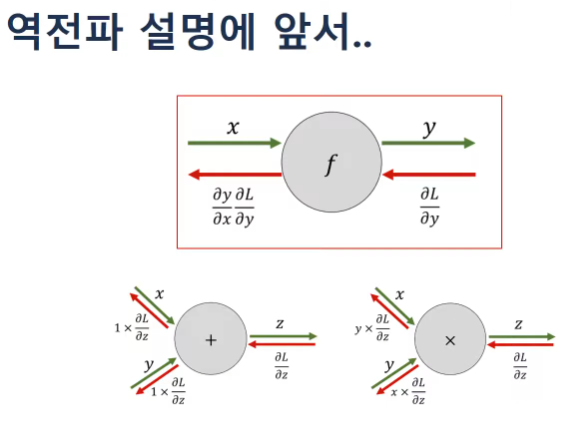

---
- 임의의 연산 f가 있다고 가정하면 f의 입력값이 x이고 출력값을 y라고 둔다.
- Forward로 가게 되면 loss까지 구할 수 있게 되고 그 loss에 대한 y의 그래디언트 partial y분의 partial loss가 뒤에 연산에서 왔다고 가정한다. 
- 그러면 체인 룰에 의해서 이 전 노드로 그래디언트를 흘려보낼때에는 loss에서 흘러들어오는 그래디언트 partial y분의 partial loss에다가 현재 연산의 local 그래디언트인 partial x분의 partial y를 곱해서 앞 연산으로 보내게 된다.
- 덧셈의 local 그래디언트는 1이고 곱셈의 local 그래디언트는 순서대로 y,x이기 때문에 흘러들어온 그래디언트에 local 그래디언트를 곱해서 역전파 된다는 사실을 그림으로 확인할 수 있다.

---

![im
age.png](
    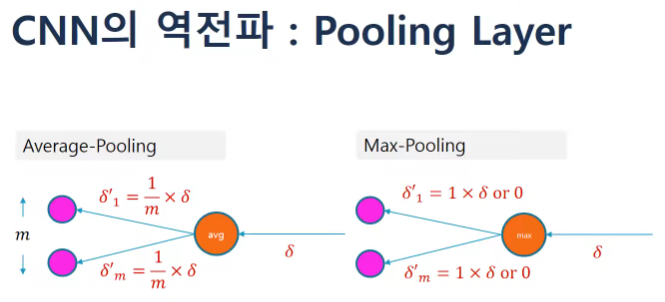)

---
> **Pooling Layer**

- Pooling은 Average, Max Pooling이 있다.
- 만약 Feature Map이 요소 갯수가 m개라고 하면 Average Pooling 같은 경우 1/m이 Local 그래디언트. 
- Max Pooling은 최대값에 해당하는 자리만 Local 그래디언트가 1이고 나머지는 0.
- 해당 그래디언트가 흘러들어온 그래디언트에 곱해져서 역전파가 되는 구조이다.

---

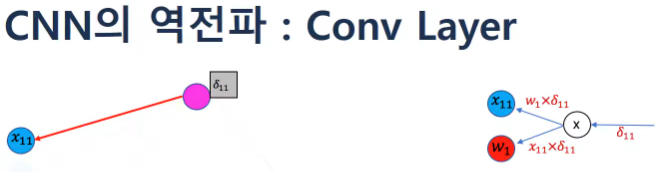

---
> **Feature Map에서 입력값의 연산**

-  x11는 첫번째 행의 첫번째 열 요소를 필터에서 빨간색 부분에 해당하는 Weight랑 곱해서 만들어지는 것.

- 전달되는 것을 δ11이라고 하게 되면 흘러들어온 그래디언트에다가 Local 그래디언트인 w1과 x11을 곱해서 각각 그래디언트가 전파되게 된다.

- Multi-Channel 아이디어에서는 예를들어 Dynamic이라고 하면 x11에 w1곱하기 δ11을 곱한 그래디언트가 흘러들어가게 하는게 Dynamic이고 이 그래디언트를 무시하고 학습을 전혀 안시키는게 Static이라고 보면된다.

---


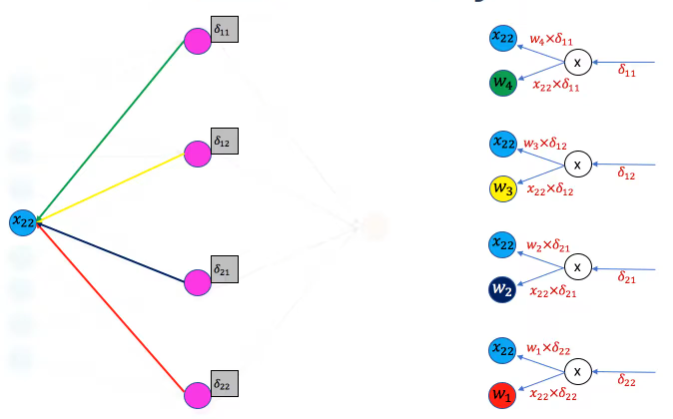

---
- x22는 4가지 요소값의 전부다 영향을 미치는 입력값이라고 볼수 있음.
- w2는 첫번째 Feature Map 요소에 갈때는 녹색 Weight와 곱해져서 들어가게 되고,
첫번째 행 두번째 열에 해당하는것은 노란색 그래디언트
차례대로 파란색 Weight 빨간색 Weight랑 곱해져서 각각 반영이 되게 되는데 이것들을 흘러들어온 그래디언트에다가 Local 그래디언트를 곱해서 각각을 전부 다 업데이트 할 수 있다.

---

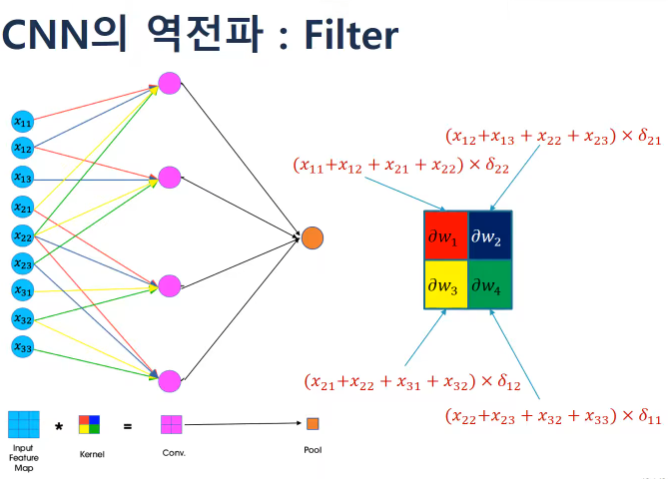

---
> ***필터 업데이트 방법***

- 예를 들면 partial w1이라고 되어 있는 부분은 partial w1분의 partial loss 이다.
- 이 그래디언트 값은  (x11 + x12 + x21 + x22) x δ22 해서 그래디언트를 구하는데 이만큼의 그래디언트에다가 사용자가 지정한 학습률 그래디언트의 반대방향 즉 - 를 취해서 w1을 업데이트하게 되면은 한 스탭에 필터 Weight 업데이트가 되게 된다.

---

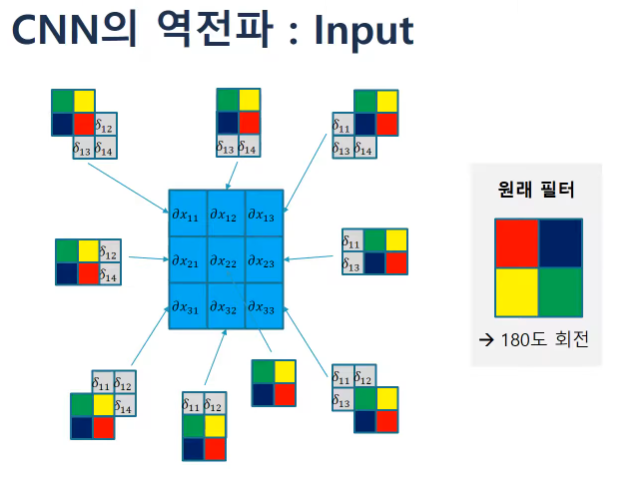

---
> ***Input***
- Input 같은 경우에는 앞선 내용들을 일반화하고 종합하면 이런식으로 나타낼수 있다.
- Multi-Channel에서 Dynamic처럼 Input에도 그래디언트를 흘러보낼려고할때 흘려보내는 그래디언트를 계산하는 방식.
이런식으로 역전파를 일반화 할 수 있게 된다.

---

### ***소감***
---
- 작년 글로벌 인턴쉽에서 텍스트 인식에 관한 모델 설계 프로젝트를 진행했었는데 CNN이 이미지, 영상말고도 텍스트에서도 좋은 성능을 나타남을 일찍히 알았다면 더 좋은 성과를 내었을 것이라는 아쉬움이 남습니다.
하지만, 이제서라도 좋은 정보, 방법을 알게 되어 앞으로 더 좋은 결과물과 연구성과를 기대하게 됩니다.
---